In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#from MyUnit import NaturalUnit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.linalg import expm

In [4]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import simpson, trapezoid
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from tqdm import tqdm
import pickle
from scan import Param
import scan as sc
from copy import deepcopy

In [5]:
import sys
sys.path.insert(0, './varying_magnetic_field/')
import base as ba

In [6]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

# Verify the experimental setup

idea: use the $\dot \theta$ to cancel the axion mass term

In [7]:
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

# helical numerical
impefect_factor = 1.000001

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_0 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='DOP853',
                   vectorized=True,
                   rtol=1e-13,
                   atol=1e-13,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_0._cB_rescale_factor_ = _cB_rescale_factor_

In [8]:
_cB_rescale_factor_ = 1e7 # note this factor is to combat the numerical precision floor

In [9]:
# helical numerical
impefect_factor = 1.01

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_001 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='RK45',
                   method='DOP853',
                   # method='BDF',
                   vectorized=True,
                   rtol=1e-13,
                   atol=1e-13,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_001._cB_rescale_factor_ = _cB_rescale_factor_

In [10]:
print('----make sure cB rescale factor* < (ma2/om-theta dot)----')
print('i.e. never introduce nonlinear regime due to large cB')
print(theta_dot*(impefect_factor-1.))
print(cB*_cB_rescale_factor_)

----make sure cB rescale factor* < (ma2/om-theta dot)----
i.e. never introduce nonlinear regime due to large cB
-4.353448275862073e-09
1.0353697510005556e-08


In [11]:
_cB_rescale_factor_ = 1e8 # note this factor is to combat the numerical precision floor

In [12]:
# helical numerical
impefect_factor = 1.03

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.


xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_003 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)

sol_helical_003._cB_rescale_factor_ = _cB_rescale_factor_

In [13]:
print('----make sure cB rescale factor* < (ma2/om-theta dot)----')
print('i.e. never introduce nonlinear regime due to large cB')
print(theta_dot*(impefect_factor-1.))
print(cB*_cB_rescale_factor_)

# ----make sure cB rescale factor* < (ma2/om-theta dot)----
# i.e. never introduce nonlinear regime due to large cB
# -1.3318965517241393e-06
# 1.0353697510005557e-07

----make sure cB rescale factor* < (ma2/om-theta dot)----
i.e. never introduce nonlinear regime due to large cB
-1.3318965517241391e-08
1.0353697510005557e-07


In [14]:
# helical numerical
impefect_factor = 1.1
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.



xi=0. * _m_eV_ /_eV_over_unit_
# xe=5. * _m_eV_ /_eV_over_unit_ #[1/eV]
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_helical_10 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='DOP853',vectorized=True,
                   rtol=1e-15,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)
sol_helical_10._cB_rescale_factor_ = _cB_rescale_factor_

/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


In [15]:
# no helical numerical
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

xi=0. * _m_eV_
xe=106 * _m_eV_
ma=1e-3 #[eV]
omega=1.16 #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_ # eV [FIXME]
theta_dot = 0.

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_no_helical = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   # method='Radau',
                   # method='LSODA',
                   # method='RK45',
                   # method='BDF',
                   method='DOP853',vectorized=True,
                   rtol=1e-15,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn],
                    dense_output=True)

sol_no_helical._cB_rescale_factor_ = _cB_rescale_factor_

In [16]:
# harmonic numerical (only B parallel but B = |B|cos(theta), similar to the David Marsh 2019 setup)
_cB_rescale_factor_ = 1e9 # note this factor is to combat the numerical precision floor
impefect_factor = 1.0001

_m_eV_ = 5067730.58270578
_G_over_GeV2_ = 1.95352783207652e-20
_GeV_over_eV_ = 1.e9
_eV_over_unit_ = 1.
_cB_rescale_factor_ = 1e5 # note this factor is to combat the numerical precision floor

xi=0. * _m_eV_ /_eV_over_unit_
xe=106. * _m_eV_ /_eV_over_unit_ #[1/eV]
ma=1e-3*_eV_over_unit_ #[eV]
omega=1.16/_eV_over_unit_ #(1064nm, from ALP II)
cB=1e-9*53000*_G_over_GeV2_*_GeV_over_eV_/_eV_over_unit_ # eV [FIXME] # [eV]
theta_dot = -ma**2/(2.*omega)/_eV_over_unit_ * impefect_factor


only_para = True

def mg2_over_om_fn(x): 
    x, is_scalar = ba.treat_as_arr(x)
    res = (x)*0.
    if is_scalar:
        res = np.squeeze(res)
    return res

def theta_fn(x):
    return theta_dot * x


sol_harmonic = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='DOP853',vectorized=True,
                   rtol=1e-15,
                   atol=1e-15,
                   args=[ma, omega, cB*_cB_rescale_factor_, mg2_over_om_fn, theta_fn, only_para],
                    dense_output=True)

# verify the harmonic modes 
de_arr = -np.pi/theta_dot * (np.arange(20)-0.25)/_m_eV_ # [m0000]

sol_harmonic._cB_rescale_factor_ = _cB_rescale_factor_

In [17]:
# analytical helical
def Pag(cB, ma, omega, L, theta_dot=0):
    k_p = (cB**2 + (ma**2/2./omega+ theta_dot)**2)**0.5 
    k_m = (cB**2 + (ma**2/2./omega- theta_dot)**2)**0.5 
    amp_p = cB**2/k_p**2 
    amp_m = cB**2/k_m**2 
    return amp_p * np.sin(k_p*L/2.)**2 + amp_m * np.sin(k_m*L/2.)**2 


#Pag(cB, ma, omega, np.array([xi,xe]))

In [18]:
from scipy.integrate import simps

def Pag_harmo(cB_arr, ma, omega, L_arr, method='simps'):
    amp = cB_arr**2/(cB_arr**2+(ma**2/2./omega)**2)
    
    # method 1
    if method == 'cumsum':
        dL_arr = np.concatenate(([0],np.diff(L_arr)))
        phase_integrand_arr = 0.5 * np.sqrt((ma**2/omega/2.)**2+cB_arr**2) * dL_arr
        phase_arr = np.cumsum(phase_integrand_arr)
    
    # method 2
    elif method == 'simps':
        phase_integrand_arr = 0.5 * np.sqrt((ma**2/omega/2.)**2+cB_arr**2)
        phase_arr = simps(phase_integrand_arr, L_arr)
        
    else:
        raise Exception('Method %s is not implemented.' %method)
    
    return amp *np.sin(phase_arr)**2

<IPython.core.display.Javascript object>


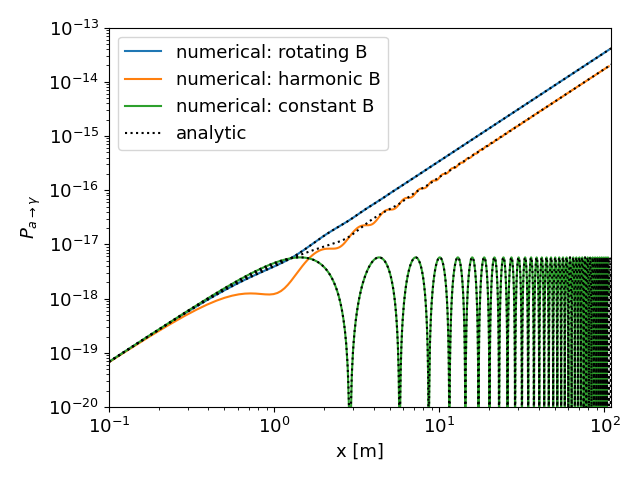

In [19]:
plt.subplots()

# numerical results
plt.plot(sol_helical_0.t/_m_eV_, (1.-np.abs(sol_helical_0.y[2])**2)/sol_helical_0._cB_rescale_factor_**2, label=r'numerical: rotating B')
plt.plot(sol_harmonic.t/_m_eV_, (1.-np.abs(sol_harmonic.y[2])**2)/sol_harmonic._cB_rescale_factor_**2, label=r'numerical: harmonic B')
plt.plot(sol_no_helical.t/_m_eV_, (1.-np.abs(sol_no_helical.y[2])**2)/sol_no_helical._cB_rescale_factor_**2, label=r'numerical: constant B')


# compare with analytical results
x_arr = np.logspace(-3, 3, 50000)
plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB/np.sqrt(2), ma, omega, x_arr*_m_eV_, theta_dot), 'k:', label=r'analytic')
plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB/2, ma, omega, x_arr*_m_eV_, theta_dot)+
         Pag(cB/2, 0., omega, x_arr*_m_eV_, -theta_dot), 'k:') # harmonic
plt.plot(x_arr*_m_eV_/_m_eV_, Pag(cB, ma, omega, x_arr*_m_eV_, 0)/2., 'k:') # constant



plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a \rightarrow \gamma}$')
plt.xlim(1e-1, 110)
plt.ylim(1e-20, 1e-13)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
# plt.savefig('plots/num-vs-ana-10pct.pdf')
# plt.savefig('plots/num-vs-ana.pdf')
# plt.savefig('plots/num-vs-ana.png')

# ma-ga contour -- no noise

In [62]:
# from the flat part of ALPS II
ga_ref_ALPSII = 1.897378608795087830e-11 # GeV**-1
B_ref = 5.3 # Tesla
x_ref = 106 # meter
psurv_ALPSII = 1./4* (ga_ref_ALPSII* B_ref *x_ref * ba._G_over_GeV2_*ba._Tesla_over_Gauss_*ba._m_eV_*ba._GeV_over_eV_ )**2
print(psurv_ALPSII)

2.784054425617672e-17


In [71]:
# reproduce ALPS II with constant B

# ma0_arr = np.logspace(-5, -3.+np.log10(2), 100)
# ma0_arr = np.linspace(1e-5, 2e-3, 100)
ma0_arr = np.linspace(1e-5, 2e-3, 400)
sol_constB_arr = []
ga_ref = 1e-9
N = 10 # doesn't matter
wavelength=1064

# append the specific ma that matches
omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
theta_dot_ref = 0.


for ma in tqdm(ma0_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.00001, 
        
        theta_dot_mean=theta_dot_ref,
        #theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=wavelength,
        verbose=False)
    sol_constB_arr.append(sol)

100%|██████████| 400/400 [08:31<00:00,  1.28s/it]


In [72]:
ga_constB_arr = []
for sol in sol_constB_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_constB_arr.append(ga)

In [23]:
# benchmark 1: fixed ma

In [24]:
10**(-3.3)

0.0005011872336272725

In [25]:
ma_ref = 10**(-3.3)
ma1_arr = np.logspace(np.log10(ma_ref/3.), np.log10(ma_ref*3.), 100)
sol_ma1_arr = []
ga_ref = 1e-9
N = 10
wavelength=1064

# append the specific ma that matches
ma1_arr = np.sort(np.concatenate((ma1_arr, [ma_ref])))
omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
theta_dot = -ma_ref**2/2/omega_ref


for ma in tqdm(ma1_arr):
    theta_dot_mean = theta_dot/(-ma**2/2/omega_ref)
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.00001, 
        #theta_dot=theta_dot_ref,
        theta_dot_mean=theta_dot_mean, 
        num_of_domains=N,
        wavelength=wavelength,
        verbose=False)
    sol_ma1_arr.append(sol)
    
ga_ma1_arr = []
for sol in sol_ma1_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    psurv = psurv/np.sqrt(2)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_ma1_arr.append(ga)

100%|██████████| 101/101 [00:29<00:00,  3.38it/s]


In [26]:
# benchmark 2

In [27]:
10**(-3.3)*2.

0.001002374467254545

In [28]:
ma_ref = 10**(-3.3)*2.
ma2_arr = np.logspace(np.log10(ma_ref/2.), np.log10(ma_ref*2.), 100)
sol_ma2_arr = []
ga_ref = 1e-9
N = 10
wavelength=1064

# append the specific ma that matches
ma2_arr = np.sort(np.concatenate((ma2_arr, [ma_ref])))
omega_ref = 2.*np.pi/wavelength*ba._one_over_nm_eV_ # [eV]
theta_dot = -ma_ref**2/2/omega_ref


for ma in tqdm(ma2_arr):
    theta_dot_mean = theta_dot/(-ma**2/2/omega_ref)
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.00001, 
        # theta_dot_mean=theta_dot_ref,
        theta_dot_mean=theta_dot_mean, 
        num_of_domains=N,
        wavelength=wavelength,
        verbose=False)
    sol_ma2_arr.append(sol)
    
ga_ma2_arr = []
for sol in sol_ma2_arr:
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    # print(psurv)
    psurv = psurv/np.sqrt(2)
    ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    ga_ma2_arr.append(ga)

100%|██████████| 101/101 [01:19<00:00,  1.26it/s]


In [29]:
# combined: each ma gets matched by $\dot\theta$

In [30]:
ma_N10_arr = np.logspace(-5, -2.5, 100)
sol_N10_arr = []
ga_ref = 1e-11
N = 10


# detection
for ma in tqdm(ma_N10_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=1064,
        verbose=False)
    sol_N10_arr.append(sol)
    


100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


In [31]:
# production
sol_N10_prod_arr = []

for ma in tqdm(ma_N10_arr):
    sol = ba.get_psurv(
        ma=ma,
        ga=ga_ref,
        sigma=0.001, 
        theta_dot_mean=1., 
        num_of_domains=N,
        wavelength=1064,
        verbose=False,
        axion_init=False)
    sol_N10_prod_arr.append(sol)

100%|██████████| 100/100 [00:30<00:00,  3.26it/s]


In [32]:
ga_N10_arr = []
for i, sol in enumerate(sol_N10_arr):
    # detection
    psurv = ((1.-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2)[-1]
    
    # production
    sol_prod = sol_N10_prod_arr[i]
    psurv_prod = ((np.abs(sol_prod.y[2])**2)/sol_prod._cB_rescale_factor_**2)[-1]
    
    # average over production and detection    
    # psurv = psurv/np.sqrt(2)
    # ga = ga_ref / (psurv/psurv_ALPSII)**0.5
    
    ga = ga_ref /(psurv*psurv_prod/psurv_ALPSII**2)**0.25
    ga_N10_arr.append(ga)

<IPython.core.display.Javascript object>


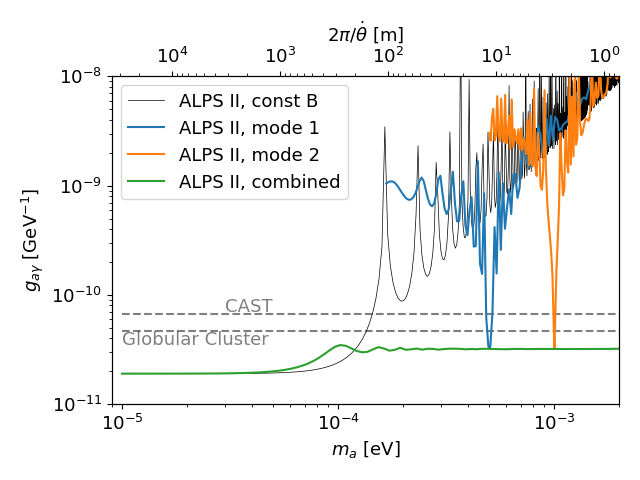

In [78]:
fig, ax1 = plt.subplots()

plt_ma_min = 9e-6
plt_ma_max = 2e-3


# add another x axis
ax2 = ax1.twiny()
# plt.plot(ma0_arr**2/2./omega_ref*ba._eV_over_MHz_, ga_constB_arr, alpha=0)
# plt.xlim(plt_ma_min**2/2./omega_ref*ba._eV_over_MHz_, plt_ma_max**2/2./omega_ref*ba._eV_over_MHz_)
# plt.xlabel(r'$\dot\theta$ [MHz]')
# plt.plot(ma0_arr**2/2./omega_ref*ba._m_eV_, ga_constB_arr, alpha=0)
# plt.xlim(plt_ma_min**2/2./omega_ref*ba._m_eV_, plt_ma_max**2/2./omega_ref*ba._m_eV_)
# plt.xlabel(r'$\dot\theta$ [1/m]')
# plt.xscale('log')
plt.plot(2.*np.pi/(ma0_arr**2/2./omega_ref*ba._m_eV_), ga_constB_arr, alpha=0)
plt.xlim(2.*np.pi/(plt_ma_min**2/2./omega_ref*ba._m_eV_), 2.*np.pi/(plt_ma_max**2/2./omega_ref*ba._m_eV_))
plt.xlabel(r'$2 \pi/\dot\theta$ [m]')
plt.xscale('log')




plt.sca(ax1)
plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=-1, linewidth=0.5) # same as O'Hare

plt.plot(ma1_arr, ga_ma1_arr, label=r"ALPS II, mode 1")
plt.plot(ma2_arr, ga_ma2_arr, label=r"ALPS II, mode 2")
plt.plot(ma_N10_arr, ga_N10_arr, label=r"ALPS II, combined")

ga_CAST = 6.644905319962873e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(3e-5, 7e-11, 'CAST', alpha=0.5)

ga_CAST = 4.7e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(1e-5, 3.5e-11, 'Globular Cluster', alpha=0.5)



plt.yscale('log')
plt.xscale('log')
plt.xlim(plt_ma_min, plt_ma_max)
plt.ylim(1e-11, 1e-8)
# plt.ylim(1e-11, 5e-9)
plt.legend()
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()

# plt.savefig('plots/ma-ga-alpsii-perfect.pdf')

In [34]:
2.**(3/4)

1.681792830507429

In [35]:
3.19/1.9

1.6789473684210527

# ma-ga contour -- Gaussian Noise

Here we plot out the results from the run on the cluster. It needs to first run with scan.py. For example:

```
$ python scan.py -s 0 -e 106 -B 5.3 -w 1064 -N 100 -l -4.5 -u -2.9 -g 5  -n 10 -c 1.e-9 -f 0.01 -t 1. -o chains/run002
python scan.py
    -s < initial coordinate >
     -e < end of propagation >
     -B < magnetic field in Tesla >
     -w < laser wavelength in nm >
     -N < number of domains >
     -l < lower value of log10ma >
     -u < lower value of log10ma >
     -g < grid size >
     -o < output folder >
     -n < number of polls>
     -c < ga in GeV**-1>
     -v < variation of noise>
     -f < fraction variation of noise
     -t < theta dot mean>
100%|████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.01s/it]
```

Now load the results.

In [36]:
# from the flat part of ALPS II
ga_ref_ALPSII = 1.897378608795087830e-11 # GeV**-1
B_ref = 5.3 # Tesla
x_ref = 106 # meter
psurv_ALPSII = 1./4* (ga_ref_ALPSII* B_ref *x_ref * ba._G_over_GeV2_*ba._Tesla_over_Gauss_*ba._m_eV_*ba._GeV_over_eV_ )**2
print(psurv_ALPSII)

2.784054425617672e-17


<IPython.core.display.Javascript object>


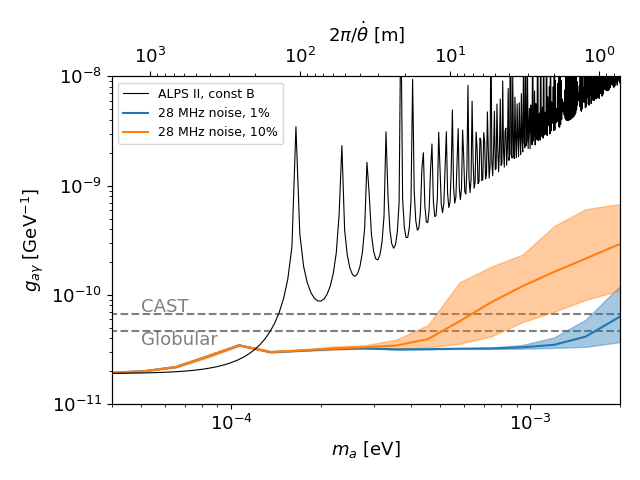

In [80]:
fig, ax1 = plt.subplots()
plt_ma_min = 4e-5
plt_ma_max = 2e-3


# add another x axis
ax2 = ax1.twiny()
# plt.plot(ma0_arr**2/2./omega_ref*ba._eV_over_MHz_, ga_constB_arr, alpha=0)
# plt.xscale('log')
# plt.xlim(plt_ma_min**2/2./omega_ref*ba._eV_over_MHz_, plt_ma_max**2/2./omega_ref*ba._eV_over_MHz_)
# plt.xlabel(r'$\dot\theta$ [MHz]')
# plt.plot(ma0_arr**2/2./omega_ref*ba._m_eV_, ga_constB_arr, alpha=0)
# plt.xlim(plt_ma_min**2/2./omega_ref*ba._m_eV_, plt_ma_max**2/2./omega_ref*ba._m_eV_)
# plt.xlabel(r'$\dot\theta$ [1/m]')
# plt.xscale('log')
plt.plot(2.*np.pi/(ma0_arr**2/2./omega_ref*ba._m_eV_), ga_constB_arr, alpha=0)
plt.xlim(2.*np.pi/(plt_ma_min**2/2./omega_ref*ba._m_eV_), 2.*np.pi/(plt_ma_max**2/2./omega_ref*ba._m_eV_))
plt.xlabel(r'$2 \pi/\dot\theta$ [m]')
plt.xscale('log')

plt.sca(ax1)
plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100, linewidth=0.8) # same as O'Hare

path_prod = './chains/run024_prod_N10_f001/result.dat'
path_det = './chains/run021_N10_f001/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(unique_ma_arr, ga_mean_arr, '-', label='28 MHz noise, 1%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)


path_prod = './chains/run024_prod_N10_f010/result.dat'
path_det = './chains/run021_N10_f010/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(unique_ma_arr, ga_mean_arr, '-', label='28 MHz noise, 10%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)



# other bounds
ga_CAST = 6.644905319962873e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 7e-11, 'CAST', alpha=0.5)

ga_CAST = 4.7e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 3.5e-11, 'Globular', alpha=0.5)



plt.yscale('log')
plt.xscale('log')
plt.xlim(plt_ma_min, plt_ma_max)
plt.ylim(1e-11, 1e-8)
plt.legend(prop={'size': 9})
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()
# plt.savefig('./plots/N10-1-10-pct.pdf')

<IPython.core.display.Javascript object>


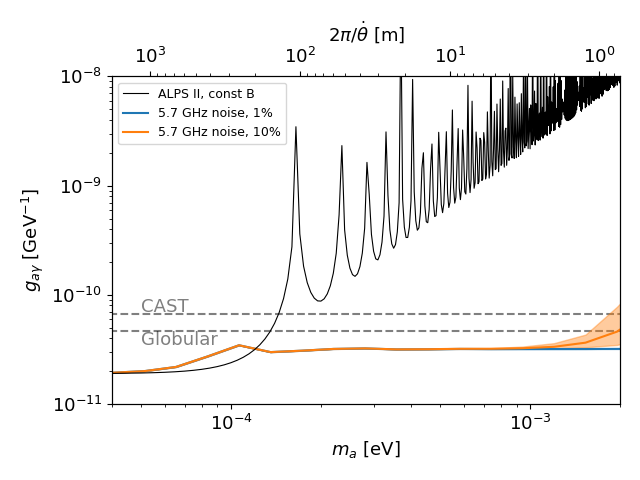

In [81]:
fig, ax1 = plt.subplots()
plt_ma_min = 4e-5
plt_ma_max = 2e-3


# add another x axis
ax2 = ax1.twiny()
# plt.plot(ma0_arr**2/2./omega_ref*ba._eV_over_MHz_, ga_constB_arr, alpha=0)
# plt.xscale('log')
# plt.xlim(plt_ma_min**2/2./omega_ref*ba._eV_over_MHz_, plt_ma_max**2/2./omega_ref*ba._eV_over_MHz_)
# plt.xlabel(r'$\dot\theta$ [MHz]')
# plt.plot(ma0_arr**2/2./omega_ref*ba._m_eV_, ga_constB_arr, alpha=0)
# plt.xlim(plt_ma_min**2/2./omega_ref*ba._m_eV_, plt_ma_max**2/2./omega_ref*ba._m_eV_)
# plt.xlabel(r'$\dot\theta$ [1/m]')
# plt.xscale('log')
plt.plot(2.*np.pi/(ma0_arr**2/2./omega_ref*ba._m_eV_), ga_constB_arr, alpha=0)
plt.xlim(2.*np.pi/(plt_ma_min**2/2./omega_ref*ba._m_eV_), 2.*np.pi/(plt_ma_max**2/2./omega_ref*ba._m_eV_))
plt.xlabel(r'$2 \pi/\dot\theta$ [m]')
plt.xscale('log')


plt.sca(ax1)

plt.plot(ma0_arr, ga_constB_arr, 'k-', label=r"ALPS II, const B", zorder=100, linewidth=0.8) # same as O'Hare

path_prod = './chains/run024_prod_N2000_f001/result.dat'
path_det = './chains/run021_N2000_f001/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(unique_ma_arr, ga_mean_arr, '-', label='5.7 GHz noise, 1%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)



path_prod = './chains/run024_prod_N2000_f010/result.dat'
path_det = './chains/run021_N2000_f010/result.dat'

(unique_ma_arr,
 ga_mean_arr, 
 ga_up_arr,
 ga_low_arr,
 grouped_ga_dct) = sc.get_contours(path_prod, path_det)

p = plt.plot(unique_ma_arr, ga_mean_arr, '-', label='5.7 GHz noise, 10%')
plt.fill_between(unique_ma_arr, 
                 ga_up_arr,
                 ga_low_arr,
                 color=p[0].get_color(),
                 alpha=0.4)






# other bounds
ga_CAST = 6.644905319962873e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 7e-11, 'CAST', alpha=0.5)

ga_CAST = 4.7e-11
plt.plot(ma_N10_arr, [ga_CAST]*len(ma_N10_arr), 'k--', zorder=-1, alpha=0.5)
plt.text(5e-5, 3.5e-11, 'Globular', alpha=0.5)




plt.yscale('log')
plt.xscale('log')
plt.xlim(plt_ma_min, plt_ma_max)
plt.ylim(1e-11, 1e-8)
plt.legend(prop={'size': 9})
plt.xlabel('$m_a$ [eV]')
plt.ylabel('$g_{a\gamma}$ [GeV$^{-1}$]')
plt.tight_layout()
# plt.savefig('./plots/N2000-1-10-pct.pdf')

In [39]:
# numerical results
path_prod = './chains/run024_prod_N2000_f010/result.dat'
ma_prod_arr, grouped_psurv_prod_dct, data_prod = sc.load_scan(path_prod)
param_prod = data_prod[0][1]
    
path_det = './chains/run021_N2000_f010/result.dat'
ma_det_arr, grouped_psurv_det_dct, data_det = sc.load_scan(path_det)
param_det = data_det[0][1]

In [40]:
data_prod[0]

array([ _cB_rescale_factor_: 35959623.78801488
                    message: 'The solver successfully reached the end of the integration interval.'
                       nfev: 48140
                       njev: 0
                        nlu: 0
                      psurv: 7.538929883583645e-18
                     status: 0
                    success: True
                          t: array([0.00000000e+00, 2.35009274e-01, 2.58510202e+00, ...,
              5.36857602e+08, 5.37014739e+08, 5.37179442e+08])
                   t_events: None
                  tolerance: 1.0000000000000001e-11
                          y: array([[ 0.00000000e+00+0.00000000e+00j,  6.39396776e-32-2.41786469e-42j,
                8.51037109e-29-3.53999570e-38j, ...,
                7.53127180e-04-6.53189733e-05j,  7.53781336e-04-6.53950040e-05j,
                7.54467377e-04-6.54747649e-05j],
              [ 1.00000000e+00+0.00000000e+00j,  1.00000000e+00+3.21669785e-32j,
                1.00000000e+00+4.28

In [41]:
def get_solutions(path):
    ma_det_arr, grouped_psurv_det_dct, data_det = sc.load_scan(path_det)
    
    counter = 0
    sol_arr = []
    param_arr = []

    for sol, param in data_det[:-1]:
        if param.ma < 1.1e-3 and param.ma>0.9e-3:
            counter += 1
            sol_arr.append(sol)
            param_arr.append(param)
    print(counter)
    print(param_arr[0].ma)
    return sol_arr, param_arr

<IPython.core.display.Javascript object>


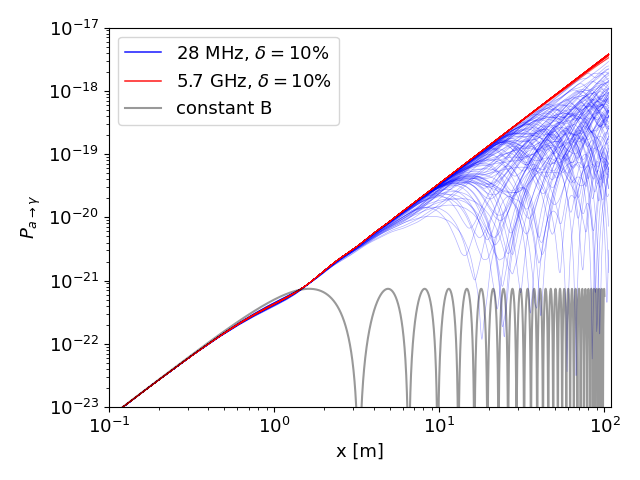

100
0.000941204967268067
100
0.000941204967268067


In [42]:
plt.subplots()

# numerical results



path_det = './chains/run021_N10_f010/result.dat'
sol_arr, param_arr = get_solutions(path_det)
for sol in sol_arr:
    plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 
             linewidth=0.5, color='b', alpha=0.3)
plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2/1e100, 
             linewidth=1.1, color='b', alpha=0.9, label='28 MHz, $\delta=10\%$')

    
path_det = './chains/run021_N2000_f010/result.dat'
sol_arr, param_arr = get_solutions(path_det)
for sol in sol_arr:
    plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2, 
             linewidth=0.5, color='r', alpha=0.3)
plt.plot(sol.t/ba._m_eV_, (1-np.abs(sol.y[2])**2)/sol._cB_rescale_factor_**2/1e100, 
             linewidth=1.1, color='r', alpha=0.9, label='5.7 GHz, $\delta=10\%$')

    

t_arr = np.logspace(-3, 2, 5000)
plt.plot(t_arr, ba.Pag_helical(ga=param_arr[0].ga,
                               ma=param_arr[0].ma,
                               B=param_arr[0].B,
                               omega=param_arr[0].omega, 
                               L=t_arr, 
                               theta_dot=0.), 'k-', alpha=0.4, label='constant B') # constant



plt.legend()
plt.xlabel('x [m]')
plt.ylabel(r'$P_{a \rightarrow \gamma}$')
plt.xlim(1e-1, 110)
plt.ylim(1e-23, 1e-17)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
# plt.savefig('plots/num-vs-ana-10pct.pdf')
# plt.savefig('plots/num-vs-ana.pdf')
# plt.savefig('plots/gaussian-1pct.pdf')
# plt.savefig('plots/gaussian-1pct.png')